Ungraded Classification Exercise (submit .ipynb when done):
https://archive.ics.uci.edu/ml/datasets/banknote+authentication

Data Engineering (15 min)
1. Load in pandas (pd.read_csv)
2. Train-test split, shuffle, scale (train_test_split, StandardScaler)

Feature Engineering (15 min)
3. Do 2-D PCA -> scatter plot to *visualize* just training set

Model Engineering (20 min)
4. Train SGDClassifier and score
5. Train SVC and score

Evaluation (15 min)
6. F1, precision, recall, confusion_matrix (classification_report)

Tune: (?? min)
7. Grid Search CV to tune

In [1]:
import pandas as pd

# 1. Load in pandas (pd.read_csv)
df = pd.read_csv('../data/banknote/data_banknote_authentication.txt',
                 names=['x1', 'x2', 'x3', 'x4', 'y'],
                 header=None)

X = df.loc[:, 'x1':'x4']
y = df.y

0    762
1    610
Name: y, dtype: int64


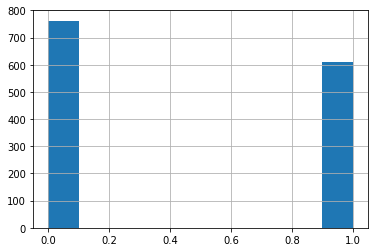

In [6]:
import matplotlib.pyplot as plt

y = df.y

# imbalance check
# count how many in each class
print(y.value_counts())

# or histogram
y.hist()
plt.show()

In [3]:
# 2. Train-test split, shuffle, scale (train_test_split, StandardScaler)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

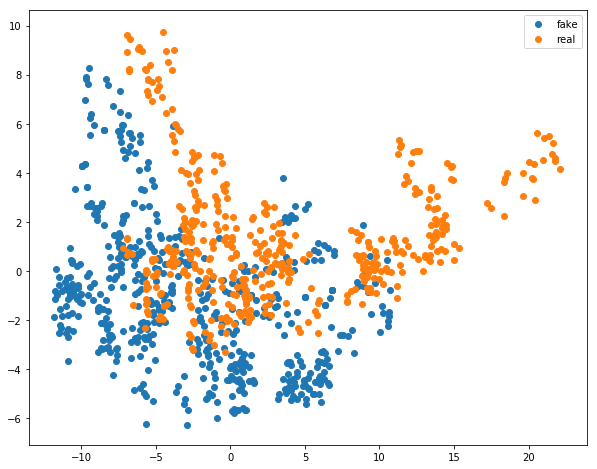

In [6]:
# 3. Do 2-D PCA -> scatter plot to *visualize* just training set
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X_train)
Z_train = pca.transform(X_train)

fig, ax = plt.subplots(figsize=(10, 8))

labels = ['fake', 'real']
n_classes = len(labels)

for i in range(n_classes):
    ax.scatter(Z_train[y_train==i, 0], Z_train[y_train==i, 1], label=labels[i])
ax.legend()
plt.show()

In [8]:
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

# 4. Train SGDClassifier and score
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train_sc, y_train)
pred_sgd = sgd.predict(X_test_sc)
print(sgd.score(X_test_sc, y_test))

# 5. Train SVC and score
svc = SVC(random_state=42)
svc.fit(X_train_sc, y_train)
pred_svc = svc.predict(X_test_sc)
print(svc.score(X_test_sc, y_test))

0.9708454810495627
1.0


C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [9]:
from sklearn.metrics import classification_report

# 6. F1, precision, recall, confusion_matrix (classification_report)
print(classification_report(y_test, pred_sgd))
print(classification_report(y_test, pred_svc))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97       191
          1       0.99      0.95      0.97       152

avg / total       0.97      0.97      0.97       343

             precision    recall  f1-score   support

          0       1.00      1.00      1.00       191
          1       1.00      1.00      1.00       152

avg / total       1.00      1.00      1.00       343



In [13]:
# 7. Grid Search CV to tune
from sklearn.model_selection import GridSearchCV

learning_rate = ['optimal', 'constant', 'invscaling'] # learning rate schedule
eta0 = [0.001, 0.01, 0.1, 1.0, 10] # learning rate initial value

# 3-fold cross validation to find best combination of parameters
gs_sgd = GridSearchCV(SGDClassifier(random_state=88),
                      param_grid={'learning_rate' : learning_rate,
                                  'eta0' : eta0})
gs_sgd.fit(X_train_sc, y_train)
print(gs_sgd.best_params_)
print(gs_sgd.score(X_test_sc, y_test))

Cs = [0.001, 0.01, 0.1, 1.0, 10] # error sensitivity
gammas = [0.001, 0.01, 0.1, 1.0, 10] # rbf constant

# 3-fold cross validation to find best combination of C and gamma
gs_svc = GridSearchCV(SVC(random_state=42),
                      param_grid={'C' : Cs, 'gamma' : gammas})
gs_svc.fit(X_train_sc, y_train)
print(gs_svc.best_params_)
print(gs_svc.score(X_test_sc, y_test))

C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\issohl\AppData\Local\Continuum\miniconda3\envs\mldds01\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default to

{'eta0': 10, 'learning_rate': 'invscaling'}
0.9883381924198251
{'C': 10, 'gamma': 0.1}
1.0
